In [40]:
from model import SIR_model_adapted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

We have to guess the values of the parameters of the model. It is not an easy task due the nature of the dataset.
The governments are collecting the data related to their country.

# Model parameters

In [41]:
rr = 0.1317 #value for rr in South Korea, check get_parameter_rr notebook
maxtr = 0.3478 #value for tr before quarantine in spain check get_parameter_trmin_trmax
mintr = 0.0904 #value for severe quarantine in Italy check get get_parameter_trmin_trmax

a = 6 #dont know the value yet, aprox 6 days of incubation https://www.worldometers.info/coronavirus/coronavirus-incubation-period/
b = 6 #no one knows

mindr = 0.01 #a study say the death rate in wuhan was 1.4%, but the sanitary system collapsed few days.So I will guess around 1% if no collapse is done
maxdr = 0.04 #dont know yet, but if the sanitary system is collapsed 4% is not crazy

Icol = 0.01 #1% of infected in Spain, less for sure...
inf_test = 0.05 #Timothy Rusell suggest that only a 5% of infected is diagnosticated in Spain

# Model

In [42]:
#Government action in the coming days, if 1 then tr is lowest, if 0 then tr is maximum.

#este seria el caso previsto actual de alargar el estado de alarma hasta el 12 de abril, y luego volver a retomar la vida
#normal con algunas restricciones. Por ejemplo mas distancia social que antes de la cuarentena, aumenta la temperatura,
#lavarse manos, discotecas cerradas, test rapidos que funcionen xd...etc

system_control = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                 0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,
                 0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,
                 0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,
                 0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,
                 0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,
                 0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,
                 0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,
                 0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]

In [43]:
sir = SIR_model_adapted(a, b, mintr, maxtr, rr, mindr, maxdr, Icol, inf_test)
y = sir.run(system_control)

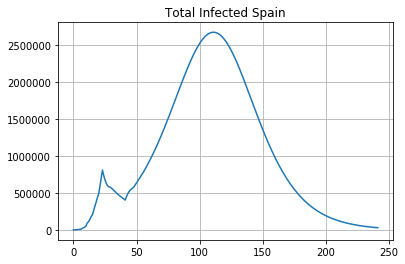

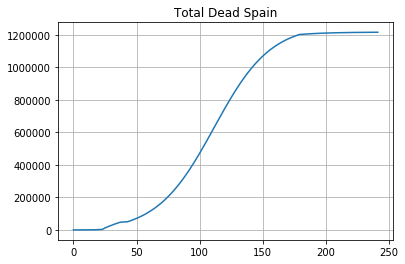

In [44]:
start = datetime.datetime(2020, 3, 2)
t = np.array([start + datetime.timedelta(days=i) for i in range(len(system_control)+24)])

N = 46700000

i = np.array(y[1].copy())
d = np.array(y[3].copy())

plt.plot(i*N)
plt.title('Total Infected Spain')
plt.grid()
plt.show()

plt.plot(d*N)
plt.title('Total Dead Spain')
plt.grid()
plt.show()